In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

import warnings
from sklearn.exceptions import ConvergenceWarning

THE FASHION ENRON DATA SET

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Names of the classes of the data present in data set and pictorial view of some of them

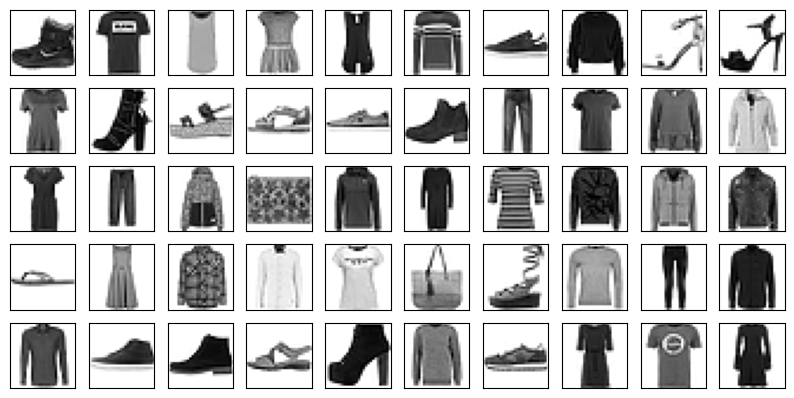

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

Trained a logistic regression model using the data set and have determined the accuracy on that model

In [ ]:
nsamples, nx, ny = train_images.shape
d2_train = train_images.reshape((nsamples,nx*ny))
nsamples, nx, ny = test_images.shape
d2_test = test_images.reshape((nsamples,nx*ny))

warnings.filterwarnings("ignore", category=ConvergenceWarning)
log_reg = LogisticRegression()
log_reg.fit(d2_train, train_labels)

score = log_reg.score(d2_test, test_labels)
print("Raw score on logistic regression =", score)

Raw score on logistic regression = 0.8412


In [ ]:
nsamples, nx, ny = train_images.shape
d2_train = train_images.reshape((nsamples,nx*ny))
nsamples, nx, ny = test_images.shape
d2_test = test_images.reshape((nsamples,nx*ny))

Tained a logistic regression model using only 50 data present in the data set

In [ ]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(d2_train[:n_labeled], train_labels[:n_labeled])

LogisticRegression()

you can see below that the accuracy in this case is only 65% which is not very much surprising to us

In [ ]:
score = log_reg.score(d2_test, test_labels)
print("Raw score on logistic regression on only 50 training examples =", score)

Raw score on logistic regression on only 50 training examples = 0.6536


Have done k means clustering on the data set and partioned the into 50 clusters

In [ ]:
kmeans = KMeans(n_clusters=50)
X_digits_dist = kmeans.fit_transform(d2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = d2_train[representative_digit_idx]

In [ ]:
 y_representative_digits = train_labels[representative_digit_idx] #class_names = [0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat',
                                                                               # 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot']

Now we are training a logistic regression model , but in some different way. we have done k means clustering of the data and using the representative data of each clusters(total 50 points) to train our model. After that we are checking the accuracy of the newly trained model.

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
score = log_reg.score(d2_test, test_labels)
print("Accuracy score after using the representative images for training:", score)

Accuracy score after using the representative images for training: 0.6461


Here we have done label propogation.  we are represting each data by the label of the representative data in it's model and training again a logistic regression model.

In [ ]:
y_train_propagated = np.empty(len(d2_train), dtype=np.int32)
for i in range(50):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
log_reg = LogisticRegression()
log_reg.fit(d2_train, y_train_propagated)
score = log_reg.score(d2_test, test_labels)
print("Accuracy score after propagating the representative images for training:", score)

Accuracy score after propagating the representative images for training: 0.6418


In [ ]:
percentile_closest = 100
X_cluster_dist = X_digits_dist[np.arange(len(d2_train)), kmeans.labels_]
for i in range(50):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = d2_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

Here we have done some modification of the training data. We are only propogating labels to neraest 20 percent data of ecah representative data in each clusters and using the data to train our model.

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
score = log_reg.score(d2_test, test_labels)
print("Accuracy score after propagating 20% of the representative images for training:", score)

Accuracy score after propagating 20% of the representative images for training: 0.6418


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Training the dataset again with logistic regression

In [ ]:
nsamples, nx, ny = train_images.shape
d2_train = train_images.reshape((nsamples,nx*ny))
nsamples, nx, ny = test_images.shape
d2_test = test_images.reshape((nsamples,nx*ny))

warnings.filterwarnings("ignore", category=ConvergenceWarning)
log_reg = LogisticRegression()
log_reg.fit(d2_train, train_labels)

score = log_reg.score(d2_test, test_labels)
print("Raw score on logistic regression on the whole dataset =", score)

Raw score on logistic regression on the whole dataset = 0.8412


In [ ]:
nsamples, nx, ny = train_images.shape
d2_train = train_images.reshape((nsamples,nx*ny))
nsamples, nx, ny = test_images.shape
d2_test = test_images.reshape((nsamples,nx*ny))

Have taken oly 20 data points to train the model

In [ ]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
n_labeled = 20
log_reg = LogisticRegression()
log_reg.fit(d2_train[:n_labeled], train_labels[:n_labeled])

LogisticRegression()

The accuracy is only 43.5 percent in this case

In [ ]:
score = log_reg.score(d2_test, test_labels)
print("Raw score on logistic regression on only 20 training examples =", score)

Raw score on logistic regression on only 20 training examples = 0.4356


Have done k means clustering with 20 clusters

In [ ]:
kmeans = KMeans(n_clusters=20)
X_digits_dist = kmeans.fit_transform(d2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = d2_train[representative_digit_idx]

In [ ]:
y_representative_digits = train_labels[representative_digit_idx] #class_names = [0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat',
                                                                               # 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot']

Traininng the logistic regressio model with the representative digits of 20 clusters

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
score = log_reg.score(d2_test, test_labels)
print("Accuracy score after using the representative images for training:", score)

Accuracy score after using the representative images for training: 0.6084


As before we have doe label propogatio and then have trained the model

In [ ]:
y_train_propagated = np.empty(len(d2_train), dtype=np.int32)
for i in range(20):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
log_reg = LogisticRegression()
log_reg.fit(d2_train, y_train_propagated)
score = log_reg.score(d2_test, test_labels)
print("Accuracy score after propagating (completely) the representative images for training:", score)

Accuracy score after propagating (completely) the representative images for training: 0.5818


In [ ]:
percentile_closest = 25
X_cluster_dist = X_digits_dist[np.arange(len(d2_train)), kmeans.labels_]
for i in range(20):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = d2_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

Have taken 25 percent of the images from the propogated clusters and then have trained the model

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
score = log_reg.score(d2_test, test_labels)
print("Accuracy score after propagating 25% of the representative images for training:", score)

Accuracy score after propagating 25% of the representative images for training: 0.571
